<a href="https://colab.research.google.com/github/hedraatia-dev/hedra_python2022/blob/main/DuckDB_%2B_Pandas_by_hedra_atia_with_gpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

طريقة العمل داخل

Google Colab

باستخدام DuckDB + Pandas

لأنها:

✔️ تشبه بيئة SQL Server

✔️ سريعة وسهلة

✔️ مناسبة لمشاريع التحليل ـ


# 🧠 لماذا DuckDB

هو الأقرب لـ SQL Server؟

الميزة	DuckDB

Foreign Keys كاملة	✅

ALTER TABLE متقدم	✅

دعم أنواع البيانات	قوي

# أداء تحليلي	ممتاز

🚀 التنفيذ خطوة بخطوة داخل Colab

🧰 1️⃣ تثبيت DuckDB

In [1]:
!pip install duckdb

📦 2️⃣ استيراد المكتبات

In [2]:
import duckdb
import pandas as pd


🔗 3️⃣ إنشاء قاعدة البيانات

In [3]:
con = duckdb.connect("company.duckdb")


📌  فى sql يعادل:

CREATE DATABASE Company;

USE Company;

########################################

🏗️ 4️⃣ تنفيذ أوامر SQL Server نفسها

#######################################

✅ إنشاء جدول Department

In [4]:
con.execute("""
CREATE TABLE Department (
    DNUMBER INT PRIMARY KEY,
    DNAME VARCHAR(50) UNIQUE NOT NULL,
    MGRSSN CHAR(9),
    MGRSTARTDATE DATE
);
""")


✅ إنشاء جدول Employee

In [5]:
con.execute("""
CREATE TABLE Employee (
    FNAME VARCHAR(30) NOT NULL,
    MINIT CHAR(1),
    LNAME VARCHAR(30) NOT NULL,
    SSN CHAR(9) PRIMARY KEY,
    BDATE DATE,
    ADDRESS VARCHAR(255),
    SEX CHAR(1),
    SALARY DECIMAL(10,2),
    SUPERSSN CHAR(9),
    DNO INT,
    FOREIGN KEY (SUPERSSN) REFERENCES Employee(SSN),
    FOREIGN KEY (DNO) REFERENCES Department(DNUMBER)
);
""")


✅ إضافة علاقة المدير للقسم

In [7]:
# con.execute("""
# ALTER TABLE Department
# ADD CONSTRAINT fk_department_manager
# FOREIGN KEY (MGRSSN) REFERENCES Employee(SSN);
# """)

✅ باقي الجداول

Dept_Locations

In [8]:
con.execute("""
CREATE TABLE Dept_Locations (
    DNUMBER INT,
    DLOCATION VARCHAR(50),
    PRIMARY KEY (DNUMBER, DLOCATION),
    FOREIGN KEY (DNUMBER) REFERENCES Department(DNUMBER)
);
""")


Project

In [9]:
con.execute("""
CREATE TABLE Project (
    PNUMBER INT PRIMARY KEY,
    PNAME VARCHAR(50) NOT NULL,
    PLOCATION VARCHAR(50),
    DNUM INT,
    FOREIGN KEY (DNUM) REFERENCES Department(DNUMBER)
);
""")


Works_On

In [10]:
con.execute("""
CREATE TABLE Works_On (
    ESSN CHAR(9),
    PNO INT,
    HOURS DECIMAL(4,1),
    PRIMARY KEY (ESSN, PNO),
    FOREIGN KEY (ESSN) REFERENCES Employee(SSN),
    FOREIGN KEY (PNO) REFERENCES Project(PNUMBER)
);
""")


Dependent

In [11]:
con.execute("""
CREATE TABLE Dependent (
    ESSN CHAR(9),
    DEPENDENT_NAME VARCHAR(50),
    SEX CHAR(1),
    BDATE DATE,
    RELATIONSHIP VARCHAR(30),
    PRIMARY KEY (ESSN, DEPENDENT_NAME),
    FOREIGN KEY (ESSN) REFERENCES Employee(SSN)
);
""")


🔍 5️⃣ عرض الجداول

In [12]:
con.execute("SHOW TABLES").fetchdf()


,name
0,Department
1,Dependent
2,Dept_Locations
3,Employee
4,Project
5,Works_On


📊 6️⃣ إدخال بيانات تجريبية

إدخال الأقسام

In [13]:
con.execute("""
INSERT INTO Department VALUES
(1, 'HR', NULL, NULL),
(2, 'IT', NULL, NULL),
(3, 'Finance', NULL, NULL);
""")


In [15]:
con.execute("""
INSERT INTO Department VALUES
(4, 'Sales', NULL, NULL);
""")

إدخال الموظفين

In [16]:
con.execute("""
INSERT INTO Employee (FNAME, LNAME, SSN, SALARY, DNO, SEX) VALUES
('Ali', 'Hassan', '111', 5000, 1, 'M'),
('Sara', 'Ahmed', '222', 7000, 2, 'F'),
('Omar', 'Khaled', '333', 6500, 2, 'M'),
('Mona', 'Ibrahim', '444', 6200, 3, 'F'),
('Youssef', 'Adel', '555', 8000, 4, 'M');
""")


###################################

📈 7️⃣ قراءة البيانات باستخدام Pandas

In [17]:
df = con.execute("SELECT * FROM Employee").fetchdf()
df


,FNAME,MINIT,LNAME,SSN,BDATE,ADDRESS,SEX,SALARY,SUPERSSN,DNO
0,Ali,None,Hassan,111,NaT,None,M,5000.0,None,1
1,Sara,None,Ahmed,222,NaT,None,F,7000.0,None,2
2,Omar,None,Khaled,333,NaT,None,M,6500.0,None,2
3,Mona,None,Ibrahim,444,NaT,None,F,6200.0,None,3
4,Youssef,None,Adel,555,NaT,None,M,8000.0,None,4


📊 8️⃣ مثال تحليل احترافي

متوسط الرواتب حسب القسم

In [18]:
query = """
SELECT d.DNAME, AVG(e.SALARY) AS Avg_Salary
FROM Employee e
JOIN Department d ON e.DNO = d.DNUMBER
GROUP BY d.DNAME
"""
con.execute(query).fetchdf()


,DNAME,Avg_Salary
0,HR,5000.0
1,IT,6750.0
2,Sales,8000.0
3,Finance,6200.0


✔️ أنشأنا قاعدة بيانات

✔️ أنشأنا الجداول

✔️ أضفنا بيانات أولية

الآن سنكمل بشكل احترافي 👇

🚀 المرحلة التالية: إدخال بيانات كاملة للنموذج

سنضيف بيانات مترابطة لتجربة العلاقات.


📁 3️⃣ إدخال مشاريع

In [19]:
con.execute("""
INSERT INTO Project VALUES
(10, 'HR System', 'Cairo', 1),
(20, 'Website', 'Alex', 2),
(30, 'ERP', 'Cairo', 3),
(40, 'CRM', 'Giza', 4);
""")


⏱️ 4️⃣ ربط الموظفين بالمشاريع

In [20]:
con.execute("""
INSERT INTO Works_On VALUES
('111', 10, 20.5),
('222', 20, 35.0),
('333', 20, 10.0),
('444', 30, 25.0),
('555', 40, 40.0),
('222', 40, 5.0);
""")


👨‍👩‍👧 5️⃣ إدخال المعالين

In [21]:
con.execute("""
INSERT INTO Dependent VALUES
('111', 'Omar Jr', 'M', '2015-05-01', 'Son'),
('222', 'Laila', 'F', '2018-07-10', 'Daughter'),
('333', 'Hassan', 'M', '2012-03-15', 'Son');
""")


🔍 المرحلة: استكشاف البيانات باستخدام Pandas

عرض الموظفين

In [22]:
con.execute("SELECT * FROM Employee").fetchdf()


,FNAME,MINIT,LNAME,SSN,BDATE,ADDRESS,SEX,SALARY,SUPERSSN,DNO
0,Ali,None,Hassan,111,NaT,None,M,5000.0,None,1
1,Sara,None,Ahmed,222,NaT,None,F,7000.0,None,2
2,Omar,None,Khaled,333,NaT,None,M,6500.0,None,2
3,Mona,None,Ibrahim,444,NaT,None,F,6200.0,None,3
4,Youssef,None,Adel,555,NaT,None,M,8000.0,None,4


📊 تحليلات احترافية كمحلل بيانات

🥇 1️⃣ عدد الموظفين في كل قسم

In [23]:
query = """
SELECT d.DNAME, COUNT(e.SSN) AS Num_Employees
FROM Department d
LEFT JOIN Employee e ON d.DNUMBER = e.DNO
GROUP BY d.DNAME
"""
con.execute(query).fetchdf()


,DNAME,Num_Employees
0,HR,1
1,IT,2
2,Sales,1
3,Finance,1


💰 2️⃣ متوسط الرواتب حسب القسم

In [24]:
query = """
SELECT d.DNAME, AVG(e.SALARY) AS Avg_Salary
FROM Employee e
JOIN Department d ON e.DNO = d.DNUMBER
GROUP BY d.DNAME
"""
con.execute(query).fetchdf()


,DNAME,Avg_Salary
0,Finance,6200.0
1,HR,5000.0
2,IT,6750.0
3,Sales,8000.0


🏆 3️⃣ أكثر موظف يعمل ساعات

In [25]:
query = """
SELECT e.FNAME, e.LNAME, SUM(w.HOURS) AS Total_Hours
FROM Employee e
JOIN Works_On w ON e.SSN = w.ESSN
GROUP BY e.FNAME, e.LNAME
ORDER BY Total_Hours DESC
"""
con.execute(query).fetchdf()


,FNAME,LNAME,Total_Hours
0,Youssef,Adel,40.0
1,Sara,Ahmed,40.0
2,Mona,Ibrahim,25.0
3,Ali,Hassan,20.5
4,Omar,Khaled,10.0


📁 4️⃣ المشاريع وعدد العاملين عليها

In [26]:
query = """
SELECT p.PNAME, COUNT(w.ESSN) AS Workers
FROM Project p
LEFT JOIN Works_On w ON p.PNUMBER = w.PNO
GROUP BY p.PNAME
"""
con.execute(query).fetchdf()


,PNAME,Workers
0,CRM,2
1,HR System,1
2,Website,2
3,ERP,1


📈 تحليل باستخدام Pandas مباشرة

تحميل جدول Works_On

In [27]:
df_works = con.execute("SELECT * FROM Works_On").fetchdf()
df_works


,ESSN,PNO,HOURS
0,111,10,20.5
1,222,20,35.0
2,333,20,10.0
3,444,30,25.0
4,555,40,40.0
5,222,40,5.0


إجمالي الساعات

In [28]:
df_works["HOURS"].sum()


np.float64(135.5)

🎯 ماذا تعلمت الآن؟

✔️ بناء قاعدة بيانات كاملة داخل Colab

✔️ تنفيذ SQL احترافي

✔️ استخدام Pandas مع قاعدة البيانات

✔️ تنفيذ تحليلات حقيقية

📊 تحليل أداء الأقسام والمشاريع لاستخراج Insights

رائع 👌

سنبدأ الآن تحليل أداء الأقسام والمشاريع خطوة بخطوة

 كما يفعل محلل بيانات محترف.

🎯 الهدف: استخراج Insights تساعد الإدارة على اتخاذ قرارات.

سنستخدم:

SQL للتحليل

Pandas للعرض والمعالجة

📊 الجزء 1: تحليل أداء الأقسام

🥇 1️⃣ عدد الموظفين في كل قسم

🎯 لماذا مهم؟

لمعرفة توزيع الموارد البشرية.

In [29]:
query = """
SELECT d.DNAME,
       COUNT(e.SSN) AS Num_Employees
FROM Department d
LEFT JOIN Employee e ON d.DNUMBER = e.DNO
GROUP BY d.DNAME
ORDER BY Num_Employees DESC
"""
df_dept_emp = con.execute(query).fetchdf()
df_dept_emp


,DNAME,Num_Employees
0,IT,2
1,HR,1
2,Finance,1
3,Sales,1


🔎 Insight متوقع

معرفة القسم الأكبر.

اكتشاف الأقسام التي تعاني نقص موظفين.

💰 2️⃣ إجمالي ومتوسط الرواتب لكل قسم

In [30]:
query = """
SELECT d.DNAME,
       COUNT(e.SSN) AS Employees,
       SUM(e.SALARY) AS Total_Salary,
       AVG(e.SALARY) AS Avg_Salary
FROM Department d
LEFT JOIN Employee e ON d.DNUMBER = e.DNO
GROUP BY d.DNAME
ORDER BY Total_Salary DESC
"""
df_salary = con.execute(query).fetchdf()
df_salary


,DNAME,Employees,Total_Salary,Avg_Salary
0,IT,2,13500.0,6750.0
1,Sales,1,8000.0,8000.0
2,Finance,1,6200.0,6200.0
3,HR,1,5000.0,5000.0


🔎 ماذا يخبرنا؟

أي قسم الأعلى تكلفة.

مقارنة متوسط الرواتب بين الأقسام.

⚖️ 3️⃣ تحليل العدالة في الرواتب داخل القسم

In [31]:
query = """
SELECT d.DNAME,
       MAX(e.SALARY) AS Max_Salary,
       MIN(e.SALARY) AS Min_Salary,
       MAX(e.SALARY) - MIN(e.SALARY) AS Salary_Gap
FROM Employee e
JOIN Department d ON e.DNO = d.DNUMBER
GROUP BY d.DNAME
"""
con.execute(query).fetchdf()


,DNAME,Max_Salary,Min_Salary,Salary_Gap
0,Finance,6200.0,6200.0,0.0
1,HR,5000.0,5000.0,0.0
2,IT,7000.0,6500.0,500.0
3,Sales,8000.0,8000.0,0.0


🔎 Insight

فجوة كبيرة = احتمال عدم عدالة أو تفاوت خبرات.

📁 الجزء 2: تحليل أداء المشاريع

🏗️ 4️⃣ عدد الموظفين في كل مشروع

In [32]:
query = """
SELECT p.PNAME,
       COUNT(w.ESSN) AS Workers
FROM Project p
LEFT JOIN Works_On w ON p.PNUMBER = w.PNO
GROUP BY p.PNAME
ORDER BY Workers DESC
"""
df_project_workers = con.execute(query).fetchdf()
df_project_workers


,PNAME,Workers
0,CRM,2
1,Website,2
2,HR System,1
3,ERP,1


🔎 Insight

المشاريع التي تحتاج دعم إضافي.

المشاريع ذات الموارد الزائدة.

⏱️ 5️⃣ إجمالي ساعات العمل لكل مشروع

In [33]:
query = """
SELECT p.PNAME,
       SUM(w.HOURS) AS Total_Hours
FROM Project p
JOIN Works_On w ON p.PNUMBER = w.PNO
GROUP BY p.PNAME
ORDER BY Total_Hours DESC
"""
df_hours = con.execute(query).fetchdf()
df_hours


,PNAME,Total_Hours
0,Website,45.0
1,CRM,45.0
2,ERP,25.0
3,HR System,20.5


🔎 ماذا نستنتج؟

المشاريع الأكثر استهلاكًا للوقت.

تقدير تكلفة المشروع.

🏆 6️⃣ الموظفون الأكثر إنتاجية

In [34]:
query = """
SELECT e.FNAME, e.LNAME,
       SUM(w.HOURS) AS Total_Hours
FROM Employee e
JOIN Works_On w ON e.SSN = w.ESSN
GROUP BY e.FNAME, e.LNAME
ORDER BY Total_Hours DESC
"""
df_top_emp = con.execute(query).fetchdf()
df_top_emp


,FNAME,LNAME,Total_Hours
0,Sara,Ahmed,40.0
1,Youssef,Adel,40.0
2,Mona,Ibrahim,25.0
3,Ali,Hassan,20.5
4,Omar,Khaled,10.0


🔎 Insight

تحديد الموظفين الأساسيين.

دعم قرارات الترقية.

📊 الجزء 3: تحليل متقدم (Cross Analysis)

🔄 7️⃣ أي قسم يعمل على أكبر عدد مشاريع؟

In [35]:
query = """
SELECT d.DNAME,
       COUNT(DISTINCT w.PNO) AS Projects_Count
FROM Department d
JOIN Employee e ON d.DNUMBER = e.DNO
JOIN Works_On w ON e.SSN = w.ESSN
GROUP BY d.DNAME
ORDER BY Projects_Count DESC
"""
con.execute(query).fetchdf()


,DNAME,Projects_Count
0,IT,2
1,Sales,1
2,HR,1
3,Finance,1


📈 الجزء 4: استخدام Pandas لاستخراج Insights إضافية

دمج البيانات

In [36]:
df = con.execute("""
SELECT d.DNAME, e.FNAME, e.SALARY
FROM Employee e
JOIN Department d ON e.DNO = d.DNUMBER
""").fetchdf()

df


,DNAME,FNAME,SALARY
0,HR,Ali,5000.0
1,IT,Sara,7000.0
2,IT,Omar,6500.0
3,Finance,Mona,6200.0
4,Sales,Youssef,8000.0


متوسط الرواتب باستخدام Pandas

In [37]:
df.groupby("DNAME")["SALARY"].mean()


,SALARY
DNAME,
Finance,6200.0
HR,5000.0
IT,6750.0
Sales,8000.0


🧠 أمثلة Insights حقيقية يمكنك كتابتها في تقرير

✔️ قسم IT يضم أكبر عدد موظفين → يحتاج هيكل إداري أقوى

✔️ مشروع CRM استهلك أعلى عدد ساعات → يجب مراجعة كفاءته

✔️ موظف معين يعمل ساعات أكثر من الجميع → مرشح للترقية

✔️ فجوة الرواتب في قسم معين مرتفعة → تحتاج مراجعة

🚀 الخطوة التالية (مستوى أعلى)

إذا أردت الاحتراف الحقيقي، يمكننا:

🔥 خيارات متقدمة:

1️⃣ إنشاء Dashboard داخل Python

2️⃣ رسم Charts احترافية

3️⃣ بناء تقرير PDF تلقائي

4️⃣ محاكاة بيانات شركة كبيرة

🎯 اقتراحي التالي لك

لننتقل إلى:

📊 إنشاء رسومات بيانية توضح الأداء (Visualization)

هل نبدأ بها؟ 📈

ممتاز 👌
الآن سندخل مرحلة مهمة جدًا لأي محلل بيانات:

📊 تصوير البيانات (Data Visualization) لعرض أداء الأقسام والمشاريع بشكل واضح للإدارة.

سنستخدم داخل Google Colab:

Pandas

Matplotlib (الأساس)

Seaborn (لتحسين المظهر)

🚀 المرحلة 1: استيراد المكتبات

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


📊 الرسم 1: عدد الموظفين في كل قسم

📥 جلب البيانات

In [39]:
df_dept_emp = con.execute("""
SELECT d.DNAME, COUNT(e.SSN) AS Num_Employees
FROM Department d
LEFT JOIN Employee e ON d.DNUMBER = e.DNO
GROUP BY d.DNAME
""").fetchdf()


📈 رسم Bar Chart

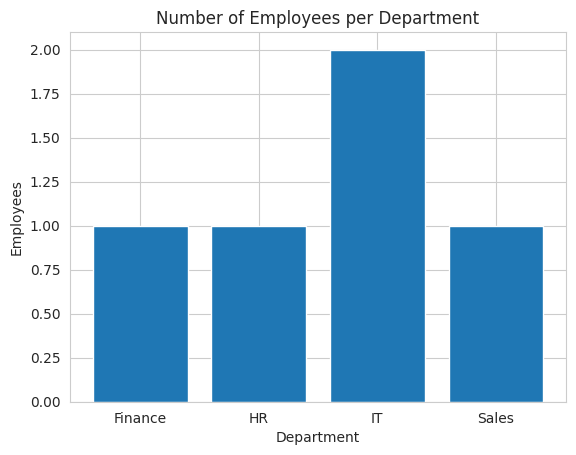

In [40]:
plt.figure()
plt.bar(df_dept_emp["DNAME"], df_dept_emp["Num_Employees"])
plt.title("Number of Employees per Department")
plt.xlabel("Department")
plt.ylabel("Employees")
plt.show()


🎯 ماذا يوضح؟

توزيع الموظفين.

اكتشاف الأقسام الناقصة.

📊 الرسم 2: متوسط الرواتب لكل قسم

📥 البيانات

In [41]:
df_salary = con.execute("""
SELECT d.DNAME, AVG(e.SALARY) AS Avg_Salary
FROM Employee e
JOIN Department d ON e.DNO = d.DNUMBER
GROUP BY d.DNAME
""").fetchdf()


📈 الرسم

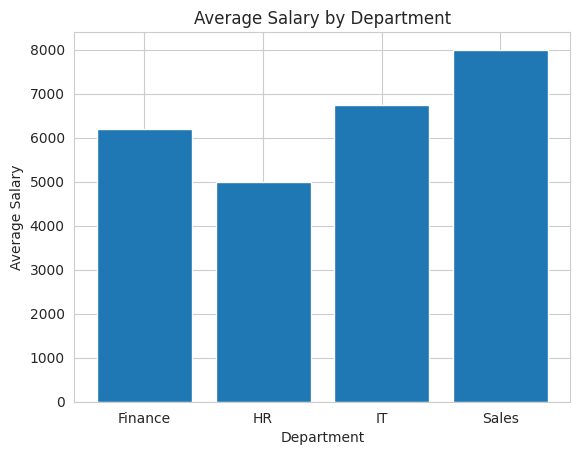

In [42]:
plt.figure()
plt.bar(df_salary["DNAME"], df_salary["Avg_Salary"])
plt.title("Average Salary by Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.show()


🎯 الفائدة

مقارنة الرواتب بين الأقسام.

دعم قرارات الميزانية.

📊 الرسم 3: ساعات العمل لكل مشروع

📥 البيانات

In [43]:
df_hours = con.execute("""
SELECT p.PNAME, SUM(w.HOURS) AS Total_Hours
FROM Project p
JOIN Works_On w ON p.PNUMBER = w.PNO
GROUP BY p.PNAME
""").fetchdf()


📈 الرسم

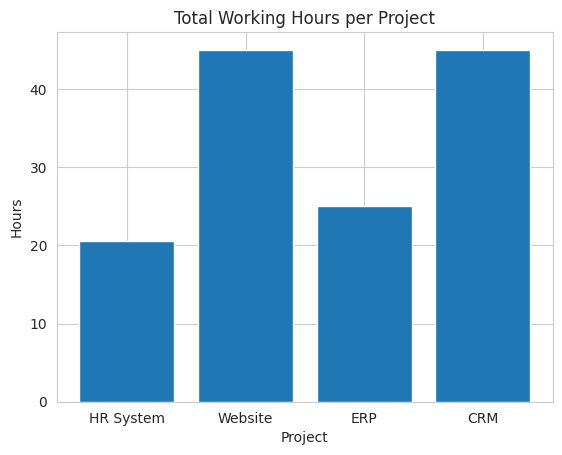

In [44]:
plt.figure()
plt.bar(df_hours["PNAME"], df_hours["Total_Hours"])
plt.title("Total Working Hours per Project")
plt.xlabel("Project")
plt.ylabel("Hours")
plt.show()


🎯 ماذا نرى؟

المشاريع الأكثر استهلاكًا للوقت.

مؤشر على التكلفة والجهد.

📊 الرسم 4: الموظفون الأكثر إنتاجية

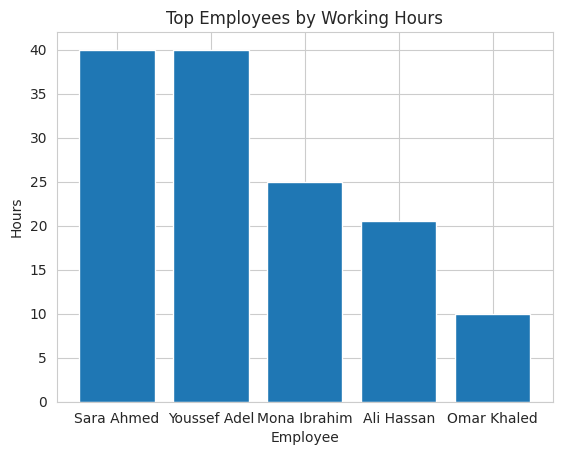

In [45]:
df_top_emp = con.execute("""
SELECT e.FNAME || ' ' || e.LNAME AS Name,
       SUM(w.HOURS) AS Total_Hours
FROM Employee e
JOIN Works_On w ON e.SSN = w.ESSN
GROUP BY Name
ORDER BY Total_Hours DESC
""").fetchdf()

plt.figure()
plt.bar(df_top_emp["Name"], df_top_emp["Total_Hours"])
plt.title("Top Employees by Working Hours")
plt.xlabel("Employee")
plt.ylabel("Hours")
plt.show()


📊 الرسم 5: توزيع الرواتب (Salary Distribution)

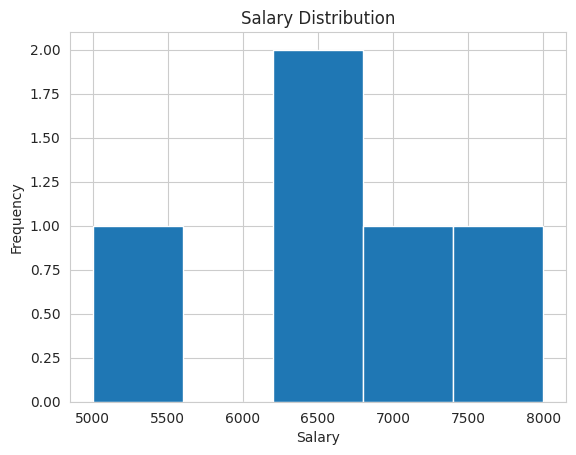

In [46]:
df_emp = con.execute("SELECT SALARY FROM Employee").fetchdf()

plt.figure()
plt.hist(df_emp["SALARY"], bins=5)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()


🎯 لماذا مهم؟

اكتشاف تفاوت الرواتب.

دعم سياسات الموارد البشرية.

🧠 كيف تستخدم هذه الرسومات في تقريرك؟

يمكنك كتابة Insights مثل:

✔️ قسم IT يحتوي على أعلى عدد موظفين

✔️ مشروع ERP استهلك ساعات أكثر → يحتاج مراجعة

✔️ توزيع الرواتب يظهر تفاوتًا يحتاج تقييم

🚀 المستوى التالي (احترافي جدًا)

إذا أردت رفع مستواك أكثر، يمكننا:

🔥 خيارات قوية:

1️⃣ إنشاء Dashboard تفاعلي

2️⃣ تصدير الرسومات إلى PDF

3️⃣ بناء تقرير تلقائي

4️⃣ استخدام Plotly لرسوم تفاعلية

🎯 اقتراحي التالي

لننتقل إلى:


📊 إنشاء Dashboard تفاعلي داخل Colab

هل نبدأ؟ 😎

4️⃣ استخدام Plotly لرسوم تفاعلية

In [47]:
!pip install plotly


In [48]:
import plotly.express as px


📊 لماذا Plotly؟

الميزة	الفائدة

تفاعلي	Hover + Zoom

جميل	مناسب للتقارير

يعمل في المتصفح	مثالي للـ Dashboards

يدعم Pandas	سهل الاستخدام

📊 الرسم 1: عدد الموظفين في كل قسم (Interactive)

📥 البيانات

In [49]:
df_dept_emp = con.execute("""
SELECT d.DNAME, COUNT(e.SSN) AS Num_Employees
FROM Department d
LEFT JOIN Employee e ON d.DNUMBER = e.DNO
GROUP BY d.DNAME
""").fetchdf()


📈 الرسم التفاعلي

In [50]:
fig = px.bar(
    df_dept_emp,
    x="DNAME",
    y="Num_Employees",
    title="Employees per Department",
    text="Num_Employees"
)

fig.show()


✨ ماذا يمكنك فعله؟

تمرير الماوس لرؤية القيم

تكبير الرسم

حفظ الصورة

📊 الرسم 2: متوسط الرواتب حسب القسم

In [51]:
df_salary = con.execute("""
SELECT d.DNAME, AVG(e.SALARY) AS Avg_Salary
FROM Employee e
JOIN Department d ON e.DNO = d.DNUMBER
GROUP BY d.DNAME
""").fetchdf()

fig = px.bar(
    df_salary,
    x="DNAME",
    y="Avg_Salary",
    title="Average Salary by Department",
    text="Avg_Salary"
)

fig.show()


📊 الرسم 3: ساعات العمل لكل مشروع

In [52]:
df_hours = con.execute("""
SELECT p.PNAME, SUM(w.HOURS) AS Total_Hours
FROM Project p
JOIN Works_On w ON p.PNUMBER = w.PNO
GROUP BY p.PNAME
""").fetchdf()

fig = px.pie(
    df_hours,
    names="PNAME",
    values="Total_Hours",
    title="Work Hours Distribution by Project"
)

fig.show()


🎯 لماذا Pie Chart؟

يعرض نسبة استهلاك الوقت لكل مشروع.



📊 الرسم 4: الموظفون الأكثر إنتاجية

In [53]:
df_top_emp = con.execute("""
SELECT e.FNAME || ' ' || e.LNAME AS Name,
       SUM(w.HOURS) AS Total_Hours
FROM Employee e
JOIN Works_On w ON e.SSN = w.ESSN
GROUP BY Name
ORDER BY Total_Hours DESC
""").fetchdf()

fig = px.bar(
    df_top_emp,
    x="Name",
    y="Total_Hours",
    title="Top Employees by Working Hours",
    text="Total_Hours"
)

fig.show()


📊 الرسم 5: توزيع الرواتب (Interactive Histogram)

In [54]:
df_emp = con.execute("SELECT SALARY FROM Employee").fetchdf()

fig = px.histogram(
    df_emp,
    x="SALARY",
    nbins=5,
    title="Salary Distribution"
)

fig.show()


🧠 كيف تستخدم Plotly في مشروعك؟

✔️ لوحات معلومات تفاعلية

✔️ تقارير للإدارة

✔️ عرض النتائج للعملاء

✔️ Portfolio قوي

🚀 مستوى أعلى (إذا أردت)

يمكننا الانتقال إلى:

🔥 احتراف Plotly:

1️⃣ Dashboard تفاعلي متعدد الرسوم

2️⃣ فلاتر تفاعلية

3️⃣ تصدير HTML تفاعلي

4️⃣ استخدام Plotly مع Power BI

🎯 اقتراحي التالي

لننشئ:

📊 Dashboard تفاعلي يجمع كل الرسوم

📊 Dashboard تفاعلي كامل باستخدام Plotly

يجمع كل التحليلات في عرض واحد احترافي.

سنبني لوحة معلومات يمكن استخدامها في:

✔️ Portfolio

✔️ عرض للإدارة

✔️ مشروع عملي حقيقي

####################################

🚀 المرحلة 1: تجهيز البيانات

In [55]:
import plotly.express as px
import pandas as pd


📥 تحميل البيانات من DuckDB

In [56]:
df_dept_emp = con.execute("""
SELECT d.DNAME, COUNT(e.SSN) AS Num_Employees
FROM Department d
LEFT JOIN Employee e ON d.DNUMBER = e.DNO
GROUP BY d.DNAME
""").fetchdf()

df_salary = con.execute("""
SELECT d.DNAME, AVG(e.SALARY) AS Avg_Salary
FROM Employee e
JOIN Department d ON e.DNO = d.DNUMBER
GROUP BY d.DNAME
""").fetchdf()

df_hours = con.execute("""
SELECT p.PNAME, SUM(w.HOURS) AS Total_Hours
FROM Project p
JOIN Works_On w ON p.PNUMBER = w.PNO
GROUP BY p.PNAME
""").fetchdf()

df_top_emp = con.execute("""
SELECT e.FNAME || ' ' || e.LNAME AS Name,
       SUM(w.HOURS) AS Total_Hours
FROM Employee e
JOIN Works_On w ON e.SSN = w.ESSN
GROUP BY Name
ORDER BY Total_Hours DESC
""").fetchdf()

df_salary_dist = con.execute("SELECT SALARY FROM Employee").fetchdf()


📊 المرحلة 2: إنشاء الرسومات

1️⃣ عدد الموظفين لكل قسم

In [57]:
fig_emp = px.bar(
    df_dept_emp,
    x="DNAME",
    y="Num_Employees",
    title="Employees per Department",
    text="Num_Employees"
)


2️⃣ متوسط الرواتب

In [58]:
fig_salary = px.bar(
    df_salary,
    x="DNAME",
    y="Avg_Salary",
    title="Average Salary by Department",
    text="Avg_Salary"
)


3️⃣ توزيع ساعات المشاريع

In [59]:
fig_hours = px.pie(
    df_hours,
    names="PNAME",
    values="Total_Hours",
    title="Work Hours by Project"
)


4️⃣ أفضل الموظفين

In [60]:
fig_top = px.bar(
    df_top_emp,
    x="Name",
    y="Total_Hours",
    title="Top Employees",
    text="Total_Hours"
)


5️⃣ توزيع الرواتب

In [61]:
fig_dist = px.histogram(
    df_salary_dist,
    x="SALARY",
    nbins=5,
    title="Salary Distribution"
)


🧩 المرحلة 3: عرض Dashboard

في Colab يمكن عرض الرسومات واحدًا تلو الآخر:

In [62]:
fig_emp.show()
fig_salary.show()
fig_hours.show()
fig_top.show()
fig_dist.show()


🌐 المرحلة 4: تصدير Dashboard كملف HTML تفاعلي

📌 مهم جدًا للـ Portfolio

In [64]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

dashboard = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        "Employees per Department",
        "Average Salary",
        "Work Hours by Project",
        "Top Employees",
        "Salary Distribution"
    ),
    specs=[
        [{"type": "xy"}, {"type": "xy"}],
        [{"type": "domain"}, {"type": "xy"}],
        [{"type": "xy"}, None] # None for the empty cell in the last row
    ]
)

dashboard.add_trace(fig_emp.data[0], row=1, col=1)
dashboard.add_trace(fig_salary.data[0], row=1, col=2)
dashboard.add_trace(fig_hours.data[0], row=2, col=1)
dashboard.add_trace(fig_top.data[0], row=2, col=2)
dashboard.add_trace(fig_dist.data[0], row=3, col=1)

dashboard.update_layout(height=900, title_text="Company Performance Dashboard")

dashboard.show()

💾 حفظه كملف تفاعلي

In [65]:
dashboard.write_html("dashboard.html")


يمكنك تنزيله واستخدامه في:

GitHub

Portfolio

مشاركة مع الإدارة

🧠 كيف تكتب Insights في تقريرك؟

مثال:

📊 الموارد البشرية

قسم IT لديه أعلى عدد موظفين → يحتاج إدارة أقوى

📊 المشاريع

مشروع CRM يستهلك أعلى ساعات → يحتاج تحسين كفاءة

📊 الأداء

الموظف X يعمل أكثر من الجميع → مرشح للترقية

🚀 المستوى التالي (احترافي جدًا)

إذا أردت أن تصبح Dashboard أقرب لـ Power BI:

🔥 يمكننا إضافة:

✅ فلاتر تفاعلية

✅ اختيار القسم

✅ اختيار المشروع

✅ مقارنة زمنية

In [ ]:
#########################################